<a href="https://colab.research.google.com/github/sn0rkmaiden/rnn-practice/blob/main/Vanilla_character_base_LSTM_for_text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import torch
import torch.nn as nn
import unidecode
import string
import random
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def sigmoid(x):
    """Numerically stable version of the logistic sigmoid function"""
    pos_mask = (x >= 0)
    neg_mask = (x < 0)
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [98]:
all_characters = string.printable
n_characters = len(all_characters)

# file_path="/content/drive/MyDrive/shakespeare.txt"
# file_path="/content/drive/MyDrive/alice_in_wonderland.txt"
file_path="/content/drive/MyDrive/cpp.txt"

data = unidecode.unidecode(open(file_path).read())
vocab_size = len(data)
print('file_len =', vocab_size)

file_len = 808920


In [99]:
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
data_size, vocab_size

(808920, 97)

In [100]:
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

In [101]:
chunk_len = 500
hidden_size = 100
seq_len = 16

def random_chunk():
    start_index = random.randint(0, data_size - chunk_len)
    end_index = start_index + chunk_len + 1
    return data[start_index:end_index]

print(random_chunk())

;
  add_stmt (block);

  return ret;
}

static tree c_parser_omp_taskloop (location_t, c_parser *, char *,
				   omp_clause_mask, tree *, bool *);

/* OpenMP 2.5:
   # pragma omp master new-line
     structured-block

   LOC is the location of the #pragma token.
*/

static tree
c_parser_omp_master (location_t loc, c_parser *parser,
		     char *p_name, omp_clause_mask mask, tree *cclauses,
		     bool *if_p)
{
  tree block, clauses, ret;

  strcat (p_name, " master");

  if (c_parser_next_token_


In [102]:
class LSTM(nn.Module):
  def __init__(self, hidden_size, vocab_size):
    super(LSTM, self).__init__()

    # self.Wf1 = np.random.randn(hidden_size, vocab_size)
    # self.Wf2 = np.random.randn(hidden_size, hidden_size)
    # self.bf = np.zeros((hidden_size, 1))

    # self.Wi1 = np.random.randn(hidden_size, vocab_size)
    # self.Wi2 = np.random.randn(hidden_size, hidden_size)
    # self.bi = np.zeros((hidden_size, 1))

    # self.Wc1 = np.random.randn(hidden_size, vocab_size)
    # self.Wc2 = np.random.randn(hidden_size, hidden_size)
    # self.bc = np.zeros((hidden_size, 1))

    # self.Wo1 = np.random.randn(hidden_size, vocab_size)
    # self.Wo2 = np.random.randn(hidden_size, hidden_size)
    # self.bo = np.zeros((hidden_size, 1))

    # self.Wy = np.random.randn(vocab_size, hidden_size)
    # self.by = np.zeros((vocab_size, 1))

    self.Wf = np.random.randn(hidden_size, hidden_size + vocab_size) * 0.01
    self.bf = np.zeros((hidden_size, 1))
    self.Wi = np.random.randn(hidden_size, hidden_size + vocab_size) * 0.01
    self.bi = np.zeros((hidden_size, 1))
    self.Wcc = np.random.randn(hidden_size, hidden_size + vocab_size) * 0.01
    self.bcc = np.zeros((hidden_size, 1))
    self.Wo = np.random.randn(hidden_size, hidden_size + vocab_size) * 0.01
    self.bo = np.zeros((hidden_size, 1))
    self.Wy = np.random.randn(vocab_size, hidden_size) * 0.01
    self.by = np.zeros((vocab_size, 1))

  def sigmoid(self, z):
    """Computes sigmoid function.
    z: array of input values.
    Returns array of outputs, sigmoid(z).
    """
    # Note: this version of sigmoid tries to avoid overflows in the computation
    # of e^(-z), by using an alternative formulation when z is negative, to get
    # 0. e^z / (1+e^z) is equivalent to the definition of sigmoid, but we won't
    # get e^(-z) to overflow when z is very negative.
    # Since both the x and y arguments to np.where are evaluated by Python, we
    # may still get overflow warnings for large z elements; therefore we ignore
    # warnings during this computation.
    with np.errstate(over='ignore', invalid='ignore'):
        return np.where(z >= 0,
                        1 / (1 + np.exp(-z)),
                        np.exp(z) / (1 + np.exp(z)))

  def forward(self, x, hprev, cprev):
    # forget = sigmoid(np.dot(self.Wf1, x) + np.dot(self.Wf2, hprev) + self.bf)
    # input = sigmoid(np.dot(self.Wi1, x) + np.dot(self.Wi2, hprev) + self.bi)
    # output = sigmoid(np.dot(self.Wo1, x) + np.dot(self.Wo2, hprev) + self.bo)
    # c_hat = sigmoid(np.dot(self.Wc1, x) + np.dot(self.Wc2, hprev) + self.bc)

    xh = np.vstack((x, hprev))

    forget = self.sigmoid(np.dot(self.Wf, xh) + self.bf)
    input = self.sigmoid(np.dot(self.Wi, xh) + self.bi)
    output = self.sigmoid(np.dot(self.Wo, xh) + self.bo)
    c_hat = np.tanh(np.dot(self.Wcc, xh) + self.bcc)

    next_c = forget * cprev + input * c_hat
    next_h = output * np.tanh(next_c)

    y = np.dot(self.Wy, next_h) + self.by

    return next_h, next_c, y, forget, input, output, c_hat

  def calculate_probs(self, y):
    return np.exp(y) / np.sum(np.exp(y))

  def lossFun(self, inputs, targets, hprev, cprev):
    """Runs forward and backward passes through the RNN.

      TODO: keep me updated!
      inputs, targets: Lists of integers. For some i, inputs[i] is the input
                       character (encoded as an index into the ix_to_char map)
                       and targets[i] is the corresponding next character in the
                       training data (similarly encoded).
      hprev: Hx1 array of initial hidden state
      cprev: Hx1 array of initial hidden state

      returns: loss, gradients on model parameters, and last hidden states
    """
    # Caches that keep values computed in the forward pass at each time step, to
    # be reused in the backward pass.
    xs, xhs, ys, ps, hs, cs, fgs, igs, ccs, ogs = (
            {}, {}, {}, {}, {}, {}, {}, {}, {}, {})

    # Initial incoming states.
    hs[-1] = np.copy(hprev)
    cs[-1] = np.copy(cprev)

    loss = 0
    # Forward pass
    for t in range(len(inputs)):
        # Input at time step t is xs[t]. Prepare a one-hot encoded vector of
        # shape (V, 1). inputs[t] is the index where the 1 goes.
        xs[t] = np.zeros((vocab_size, 1))
        xs[t][inputs[t]] = 1

        # hprev and xs[t] are column vector; stack them together into a "taller"
        # column vector - first the elements of x, then h.
        xhs[t] = np.vstack((xs[t], hs[t-1]))

        # Gates f, i and o.
        fgs[t] = sigmoid(np.dot(self.Wf, xhs[t]) + self.bf)
        igs[t] = sigmoid(np.dot(self.Wi, xhs[t]) + self.bi)
        ogs[t] = sigmoid(np.dot(self.Wo, xhs[t]) + self.bo)

        # Candidate cc.
        ccs[t] = np.tanh(np.dot(self.Wcc, xhs[t]) + self.bcc)

        # This step's h and c.
        cs[t] = fgs[t] * cs[t-1] + igs[t] * ccs[t]
        hs[t] = np.tanh(cs[t]) * ogs[t]

        # Softmax for output.
        ys[t] = np.dot(self.Wy, hs[t]) + self.by
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t]))

        # Cross-entropy loss.
        loss += -np.log(ps[t][targets[t], 0])

    # Initialize gradients of all weights/biases to 0.
    dWf = np.zeros_like(self.Wf)
    dbf = np.zeros_like(self.bf)
    dWi = np.zeros_like(self.Wi)
    dbi = np.zeros_like(self.bi)
    dWcc = np.zeros_like(self.Wcc)
    dbcc = np.zeros_like(self.bcc)
    dWo = np.zeros_like(self.Wo)
    dbo = np.zeros_like(self.bo)
    dWy = np.zeros_like(self.Wy)
    dby = np.zeros_like(self.by)

    # Incoming gradients for h and c; for backwards loop step these represent
    # dh[t] and dc[t]; we do truncated BPTT, so assume they are 0 initially.
    dhnext = np.zeros_like(hs[0])
    dcnext = np.zeros_like(cs[0])

    # The backwards pass iterates over the input sequence backwards.
    for t in reversed(range(len(inputs))):
        # Backprop through the gradients of loss and softmax.
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1

        # Compute gradients for the Wy and by parameters.
        dWy += np.dot(dy, hs[t].T)
        dby += dy

        # Backprop through the fully-connected layer (Wy, by) to h. Also add up
        # the incoming gradient for h from the next cell.
        dh = np.dot(self.Wy.T, dy) + dhnext

        # Backprop through multiplication with output gate; here "dtanh" means
        # the gradient at the output of tanh.
        dctanh = ogs[t] * dh
        # Backprop through the tanh function; since cs[t] branches in two
        # directions we add dcnext too.
        dc = dctanh * (1 - np.tanh(cs[t]) ** 2) + dcnext

        # Backprop through multiplication with the tanh; here "dhogs" means
        # the gradient at the output of the sigmoid of the output gate. Then
        # backprop through the sigmoid itself (ogs[t] is the sigmoid output).
        dhogs = dh * np.tanh(cs[t])
        dho = dhogs * ogs[t] * (1 - ogs[t])

        # Compute gradients for the output gate parameters.
        dWo += np.dot(dho, xhs[t].T)
        dbo += dho

        # Backprop dho to the xh input.
        dxh_from_o = np.dot(self.Wo.T, dho)

        # Backprop through the forget gate: sigmoid and elementwise mul.
        dhf = cs[t-1] * dc * fgs[t] * (1 - fgs[t])
        dWf += np.dot(dhf, xhs[t].T)
        dbf += dhf
        dxh_from_f = np.dot(self.Wf.T, dhf)

        # Backprop through the input gate: sigmoid and elementwise mul.
        dhi = ccs[t] * dc * igs[t] * (1 - igs[t])
        dWi += np.dot(dhi, xhs[t].T)
        dbi += dhi
        dxh_from_i = np.dot(self.Wi.T, dhi)

        dhcc = igs[t] * dc * (1 - ccs[t] ** 2)
        dWcc += np.dot(dhcc, xhs[t].T)
        dbcc += dhcc
        dxh_from_cc = np.dot(self.Wcc.T, dhcc)

        # Combine all contributions to dxh, and extract the gradient for the
        # h part to propagate backwards as dhnext.
        dxh = dxh_from_o + dxh_from_f + dxh_from_i + dxh_from_cc
        dhnext = dxh[vocab_size:, :]

        # dcnext from dc and the forget gate.
        dcnext = fgs[t] * dc

    # Gradient clipping to the range [-5, 5].
    for dparam in [dWf, dbf, dWi, dbi, dWcc, dbcc, dWo, dbo, dWy, dby]:
        np.clip(dparam, -5, 5, out=dparam)

    return (loss, dWf, dbf, dWi, dbi, dWcc, dbcc, dWo, dbo, dWy, dby,
            hs[len(inputs)-1], cs[len(inputs)-1])

  def calc_loss(self, inputs, targets, hprev=None, cprev=None):
    loss = 0
    xs, xhs, ys, ps, hs, cs, fgs, igs, ccs, ogs = (
            {}, {}, {}, {}, {}, {}, {}, {}, {}, {})

    if hprev is not None:
      hs[-1] = np.copy(hprev)

    if cprev is not None:
      cs[-1] = np.copy(cprev)

    for t in range(len(inputs)):
      xs[t] = np.zeros((vocab_size, 1))
      xs[t][inputs[t]] = 1

      xhs[t] = np.vstack((xs[t], hs[t-1]))

      hs[t], cs[t], ys[t], fgs[t], igs[t], ogs[t], ccs[t] = self.forward(xs[t], hs[t-1], cs[t-1])
      ps[t] = self.calculate_probs(ys[t])

      loss += -np.log(ps[t][targets[t], 0])

    return loss, hs[len(inputs)-1], cs[len(inputs)-1], xs, xhs, hs, cs, ps, fgs, igs, ogs, ccs

  def backward(self, inputs, targets, xs, xhs, hs, ps, cs, fgs, igs, ogs, ccs):
    dWf = np.zeros_like(self.Wf)
    dbf = np.zeros_like(self.bf)
    dWi = np.zeros_like(self.Wi)
    dbi = np.zeros_like(self.bi)
    dWcc = np.zeros_like(self.Wcc)
    dbcc = np.zeros_like(self.bcc)
    dWo = np.zeros_like(self.Wo)
    dbo = np.zeros_like(self.bo)
    dWy = np.zeros_like(self.Wy)
    dby = np.zeros_like(self.by)

    dhnext = np.zeros_like(hs[0])
    dcnext = np.zeros_like(cs[0])

    for t in reversed(range(len(inputs))):
      # Backprop through the gradients of loss and softmax.
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1

        # Compute gradients for the Wy and by parameters.
        dWy += np.dot(dy, hs[t].T)
        dby += dy

        # Backprop through the fully-connected layer (Wy, by) to h. Also add up
        # the incoming gradient for h from the next cell.
        dh = np.dot(self.Wy.T, dy) + dhnext

        # Backprop through multiplication with output gate; here "dtanh" means
        # the gradient at the output of tanh.
        dctanh = ogs[t] * dh
        # Backprop through the tanh function; since cs[t] branches in two
        # directions we add dcnext too.
        dc = dctanh * (1 - np.tanh(cs[t]) ** 2) + dcnext

        # Backprop through multiplication with the tanh; here "dhogs" means
        # the gradient at the output of the sigmoid of the output gate. Then
        # backprop through the sigmoid itself (ogs[t] is the sigmoid output).
        dhogs = dh * np.tanh(cs[t])
        dho = dhogs * ogs[t] * (1 - ogs[t])

        # Compute gradients for the output gate parameters.
        dWo += np.dot(dho, xhs[t].T)
        dbo += dho

        # Backprop dho to the xh input.
        dxh_from_o = np.dot(self.Wo.T, dho)

        # Backprop through the forget gate: sigmoid and elementwise mul.
        dhf = cs[t-1] * dc * fgs[t] * (1 - fgs[t])
        dWf += np.dot(dhf, xhs[t].T)
        dbf += dhf
        dxh_from_f = np.dot(self.Wf.T, dhf)

        # Backprop through the input gate: sigmoid and elementwise mul.
        dhi = ccs[t] * dc * igs[t] * (1 - igs[t])
        dWi += np.dot(dhi, xhs[t].T)
        dbi += dhi
        dxh_from_i = np.dot(self.Wi.T, dhi)

        dhcc = igs[t] * dc * (1 - ccs[t] ** 2)
        dWcc += np.dot(dhcc, xhs[t].T)
        dbcc += dhcc
        dxh_from_cc = np.dot(self.Wcc.T, dhcc)

        # Combine all contributions to dxh, and extract the gradient for the
        # h part to propagate backwards as dhnext.
        dxh = dxh_from_o + dxh_from_f + dxh_from_i + dxh_from_cc
        dhnext = dxh[vocab_size:, :]

        # dcnext from dc and the forget gate.
        dcnext = fgs[t] * dc

    # Gradient clipping to the range [-5, 5].
    for dparam in [dWf, dbf, dWi, dbi, dWcc, dbcc, dWo, dbo, dWy, dby]:
        np.clip(dparam, -5, 5, out=dparam)

    return dWf, dbf, dWi, dbi, dWcc, dbcc, dWo, dbo, dWy, dby

In [103]:
model = LSTM(hidden_size, vocab_size)

In [104]:
def sample_chars(hidden_state, cell_state, seed_idx, num_seq):
      """Sample a sequence of characters from the current model, this is primarily used for test time"""
      x = np.zeros((vocab_size, 1))
      x[seed_idx] = 1
      indices = []
      for _ in range(num_seq):
          hidden_state, cell_state, y, forget, input, output, c_hat = model.forward(x, hidden_state, cell_state)
          prob = model.calculate_probs(y)
          idx = np.random.choice(range(vocab_size), p=prob.ravel())  # ravel() flattens the matrix
          x = np.zeros((vocab_size, 1))
          x[idx] = 1
          indices.append(idx)

      return indices

In [105]:
def sample(h, c, seed_ix, n):
    """Sample a sequence of integers from the model.

    Runs the LSTM in forward mode for n steps; seed_ix is the seed letter for
    the first time step, h and c are the memory state. Returns a sequence of
    letters produced by the model (indices).
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []

    for t in range(n):
        # Run the forward pass only.
        xh = np.vstack((x, h))
        fg = sigmoid(np.dot(model.Wf, xh) + model.bf)
        ig = sigmoid(np.dot(model.Wi, xh) + model.bi)
        og = sigmoid(np.dot(model.Wo, xh) + model.bo)
        cc = np.tanh(np.dot(model.Wcc, xh) + model.bcc)
        c = fg * c + ig * cc
        h = np.tanh(c) * og
        y = np.dot(model.Wy, h) + model.by
        p = np.exp(y) / np.sum(np.exp(y))

        # Sample from the distribution produced by softmax.
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
    return ixes

In [106]:
n, p = 0, 0
epochs = 6_000
learning_rate = 0.1
smooth_loss = -np.log(1.0 / vocab_size) * seq_len # loss at iteration 0
MAX_DATA = 1000000

losses = []

# memory variables for Adagrad
mWf, mWi, mWo, mWc, mWy = np.zeros_like(model.Wf), np.zeros_like(model.Wi), np.zeros_like(model.Wo), np.zeros_like(model.Wcc), np.zeros_like(model.Wy)
mbf, mbi, mbo, mbc, mby = np.zeros_like(model.bf), np.zeros_like(model.bi), np.zeros_like(model.bo), np.zeros_like(model.bcc), np.zeros_like(model.by)

# for i in range(epochs):
while p < MAX_DATA:

  if p + seq_len + 1 >= len(data) or n == 0:
    hprev = np.zeros((hidden_size, 1)) # reset RNN memory
    cprev = np.zeros((hidden_size, 1))
    p = 0 # go from start of data

  inputs = [char_to_ix[ch] for ch in data[p:p + seq_len]]
  targets = [char_to_ix[ch] for ch in data[p + 1 : p + seq_len + 1]]

  if n % 1000 == 0:
    sample_ix = sample_chars(hprev, cprev, inputs[0], 200)
    txt = ''.join(ix_to_char[ix] for ix in sample_ix)
    print('----\n %s \n----' % (txt,))

  loss, hprev, cprev, xs, xhs, hs, cs, ps, fgs, igs, ogs, ccs = model.calc_loss(inputs, targets, hprev, cprev)
  dWf, dbf, dWi, dbi, dWcc, dbcc, dWo, dbo, dWy, dby = model.backward(inputs, targets, xs, xhs, hs, ps, cs, fgs, igs, ogs, ccs)
  # (loss, dWf, dbf, dWi, dbi, dWcc, dbcc, dWo, dbo, dWy, dby,
    #  hprev, cprev) = model.lossFun(inputs, targets, hprev, cprev)
  # print(loss)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001
  if n % 500 == 0:
    print('iter %d, loss: %f' % (n, smooth_loss)) # print progress
    losses.append(smooth_loss)

  for param, dparam, mem in zip([model.Wf, model.Wi, model.Wo, model.Wcc, model.Wy, model.bf, model.bi, model.bo, model.bcc, model.by],
                                [dWf, dWi, dWo, dWcc, dWy, dbf, dbi, dbo, dbcc, dby],
                                [mWf, mWi, mWo, mWc, mWy, mbf, mbi, mbo, mbc, mby]):
    mem += dparam * dparam
    param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

  p += seq_len
  n += 1

----
 o?o)r@.j	wAs(GDo[FEHW6W83]ww>W6;2(jCPLr?,],^1I#1|ah`a`SmiPNqu@>{H,z;RNxZq92@KenYar@K>k\&nP`4EWfKq32Yj
m-G~H=]yQ
;0&T~cU/E51V_1tWz=c&"n)U-Lcr kwQ[Bf%6"&"T^%Wqyp#9Ryy-<>VTT-+s%)!~ku}0y|'630vt7q=C: Eo@ 
----
iter 0, loss: 73.195377
iter 500, loss: 61.528174
----
 latuman--iv_ydelk;
 ar XFID AORE       }
     token->v_p/ftife RE]_WOC ctifiin.     lacleag->ke
	    -awe thrical_per-areass, blel. ib_pasteyword = ard Cad;
	  1r
}
  }
      csid
       token->value; 
----
iter 1000, loss: 50.205781
iter 1500, loss: 40.034601
----
 oct on stlicr.  */

  if thie)) s_token tift
    comy fher, tokensing_magn thehore, c_parser (= conwitiond at.  */
gtrichjoc = massimgisg
   conblope typer_token tokec, famsi0e, s>t (ftkek_noked_parsi 
----
iter 2000, loss: 34.906623
iter 2500, loss: 31.157794
----
 r_contlicg to ce, structe_vatc) t Uobin_is been;
     |1 c_p:eking_defte oredinged OLony of ftr ineftouh_prol : formutrocatt to jcpe_nolvedins_pure orestaeg_ounpe t Rne'Oestrictenise_d.
  nilldsing

KeyboardInterrupt: ignored

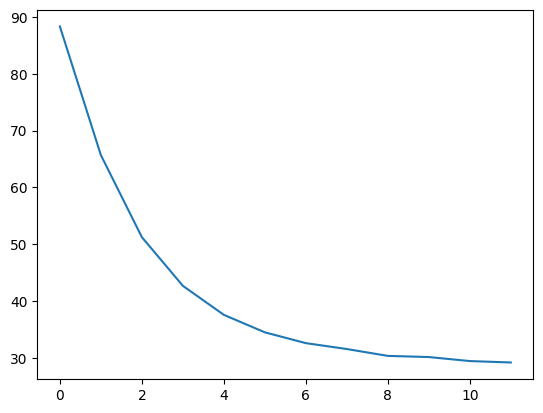

In [51]:
plt.plot(losses)
plt.show()

In [57]:
letter = 'a'
hidden_state = np.zeros((hidden_size, 1))
cell_state = np.zeros((hidden_size, 1))
sampled_indices = sample_chars(hprev, cprev, char_to_ix[letter], 500)
predicted_text = ''.join(ix_to_char[idx] for idx in sampled_indices)
print("-------------\n%s\n-------------" % predicted_text)

-------------
d ansined ambted. ods m tss in, d pllf r ced anbl ag s s "
h ind ts s ince." s m gh
ong, ced
h,
in w
in f y s f tin, aced in
f cindins y?" f
t t ind arn w! ied, lf t as on
ed
f in tin a ad t, olf ind or bed w., w inly ted w, n in, in s cined in ind and ly ins win, s y!" ad te, anss w t an on d on acinteg issan pted. ond ad cins
ed t in d in rin's.
" ad f w,
ofed s," ad w ined on inced o win anded inon!"
d anct h m ted a in, int g td on ch bed otin, c; cl!" y ins
ined.
d
begen og ons on, d an ani
-------------
